# Bacteria images in a circle (microscope objective)

Source: https://drive.google.com/drive/folders/1DCt4EbkYoGHun22IWgT5OGWpmQlsMuHs

from the openpiv-users group: 
s
https://groups.google.com/g/openpiv-users/c/Us_q7h3Uri8/m/1p8XAYkHCQAJ

In [36]:
%load_ext watermark
%watermark -v -m -p numpy,openpiv -g -b

# if it fails, use %pip install watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.7.0

numpy  : 1.24.1
openpiv: 0.26.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 5.4.0-144-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git hash: 0b2f28f97c24a59590915efb9a31bb7f02835de7

Git branch: synthetic_image



In [37]:
from openpiv import tools
from openpiv.piv import simple_piv

import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [38]:
images = sorted(pathlib.Path('../test17').glob('*.tif'))
print(images)

[PosixPath('../test17/bacteria-in-droplet-0.tif'), PosixPath('../test17/bacteria-in-droplet-1.tif')]


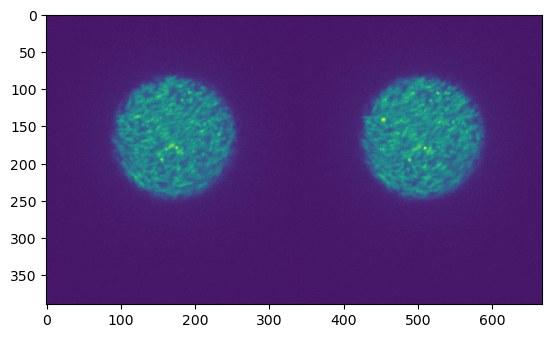

In [39]:
a,b = tools.imread(images[0]), tools.imread(images[1])
plt.imshow(np.c_[a,b])

We see the mask as a circle, but OpenPIV does not know about it, we see some vectors "inside the masked region". Since the arrows inside are erroneous, these are removed in the post-processing validation. 

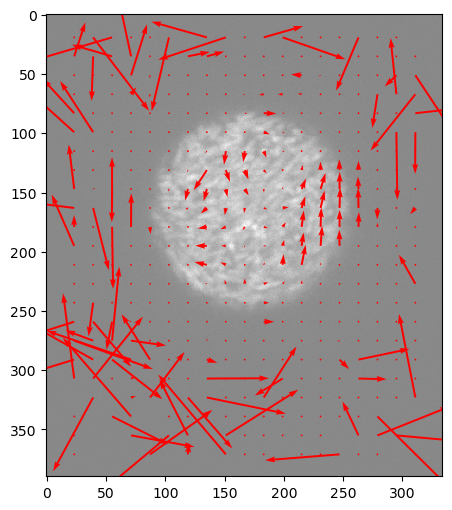

In [40]:
simple_piv(a,b);

## Let's create a mask - it's an image size matrix of booleans

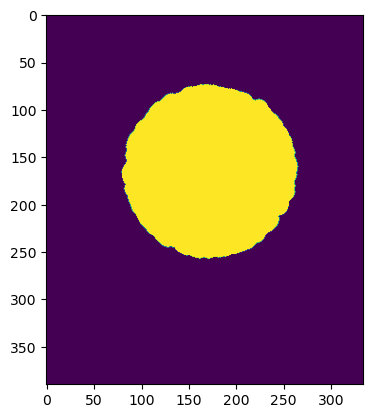

In [41]:
from skimage.morphology import binary_dilation, disk, white_tophat


# binary thresholding
mask = a > 150 # manually adjusted to 150

# remove tracers:
mask = np.logical_xor(mask, white_tophat(mask, disk(3))) # remove small objects

# increase a bit the mask borders 
mask = binary_dilation(mask, disk(7)) # dilate large object

plt.imshow(mask)

## Note that we use ~mask to invert the mask

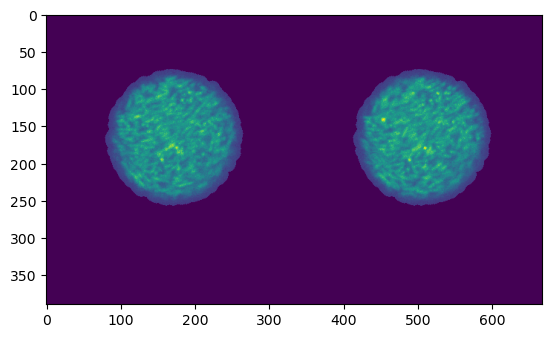

In [42]:
# long and descriptive way:
masked_a = a.copy()
masked_b = b.copy()
masked_a[~mask] = 0
masked_b[~mask] = 0
plt.imshow(np.c_[masked_a, masked_b])

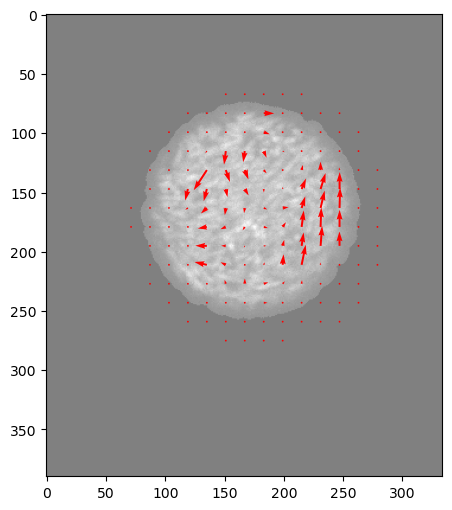

In [43]:
simple_piv(masked_a, masked_b);

## How to use static masking with multi-pass window deformation processor

In [44]:
from openpiv import windef
settings = windef.PIVSettings()
settings.filepath_images = pathlib.Path('.')
settings.frame_pattern_a = str(images[0])
settings.frame_pattern_b = str(images[1])

settings.static_masking = True
settings.static_mask = ~mask
settings.show_all_plots = True
settings.show_plot = True

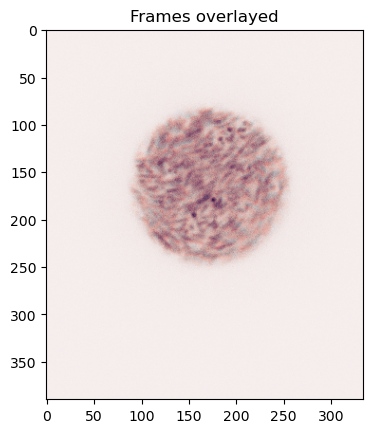

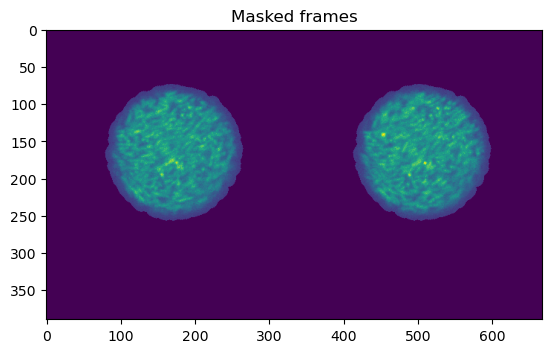

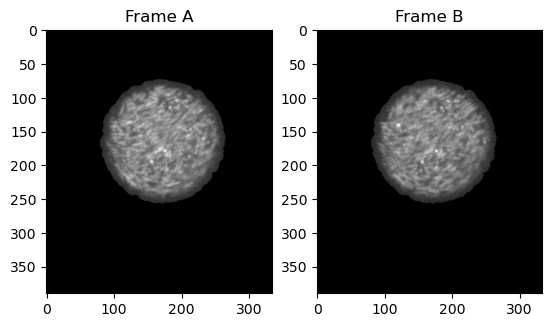

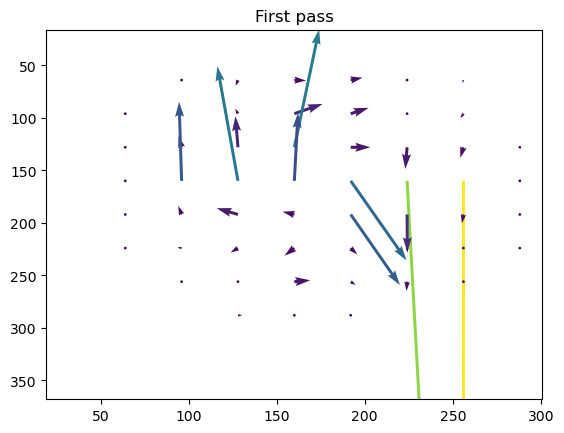

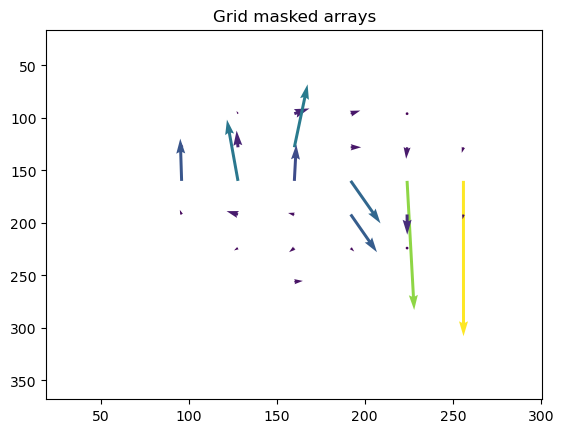

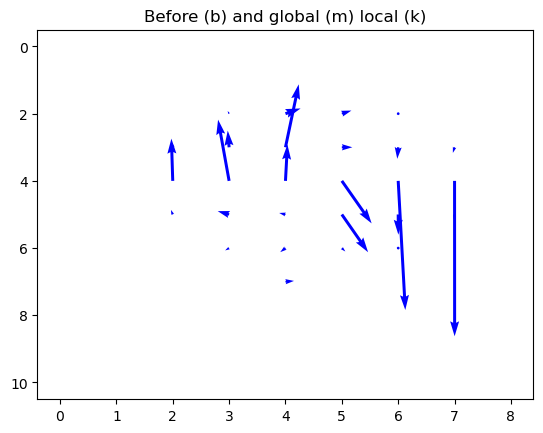

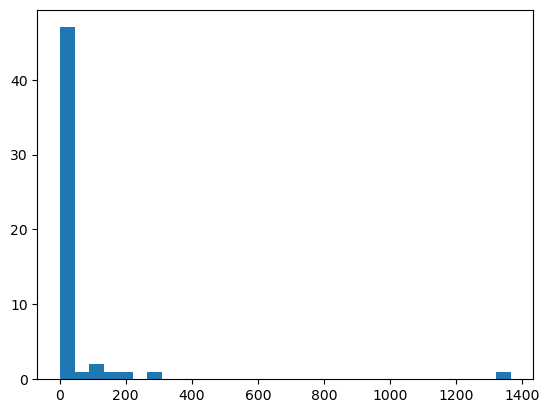

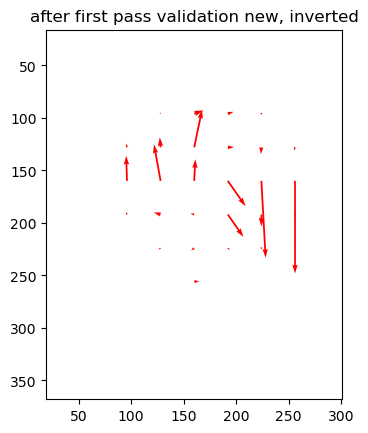

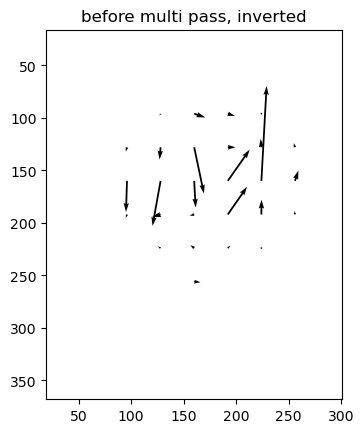

(23, 19) (23, 19) (23, 19)


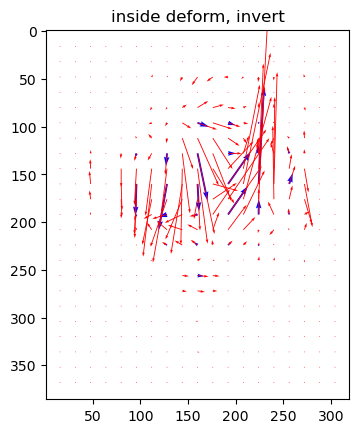

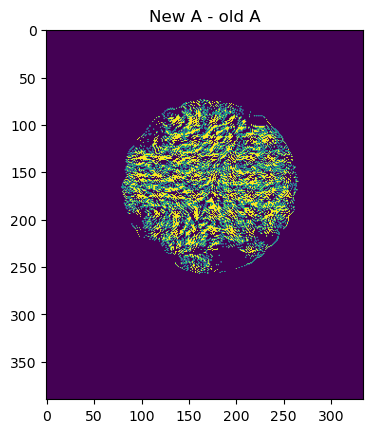

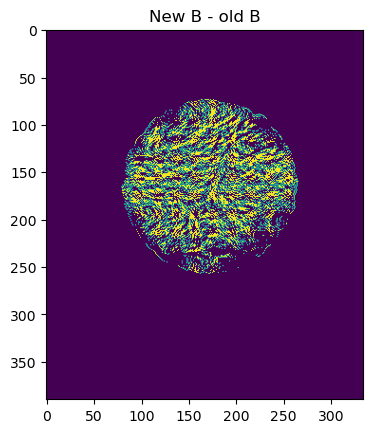

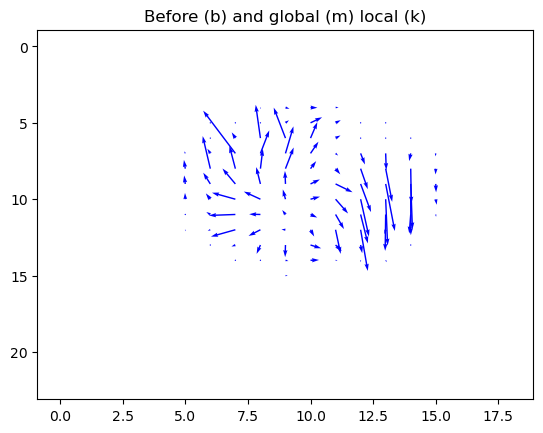

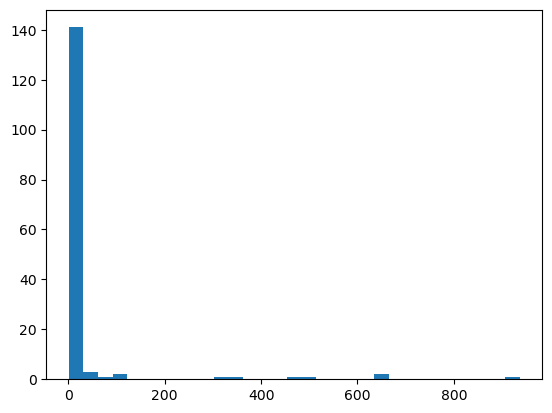

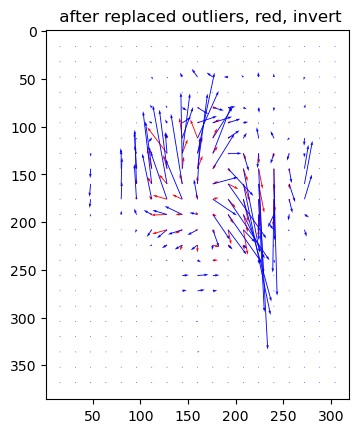

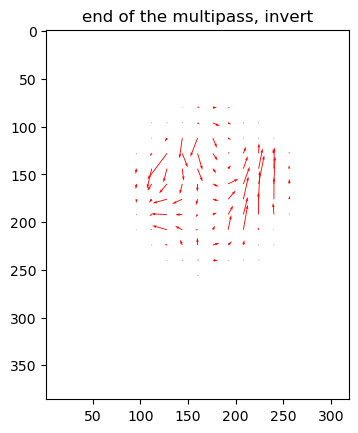

(47, 40) (47, 40) (47, 40)


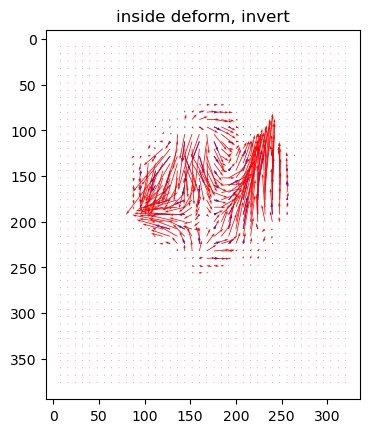

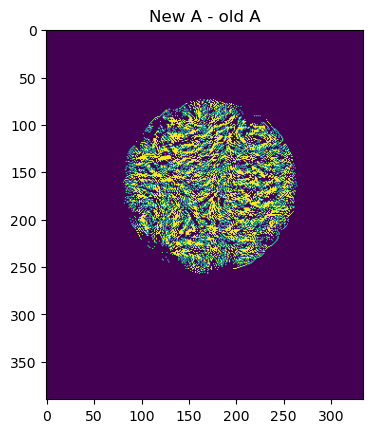

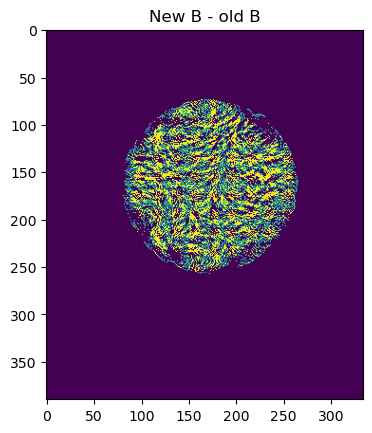

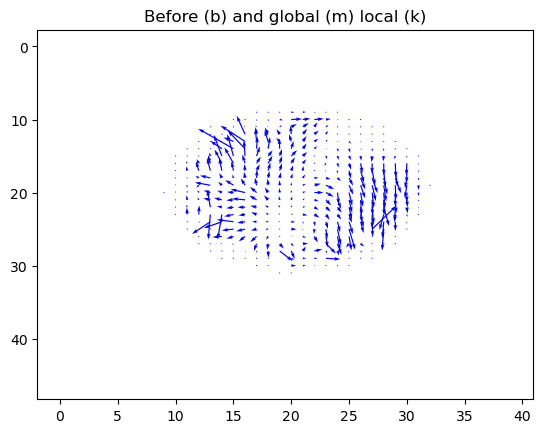

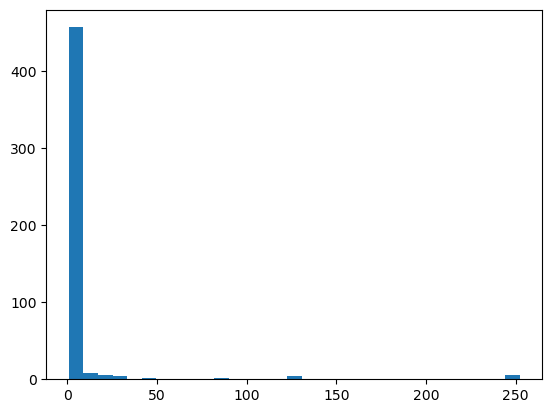

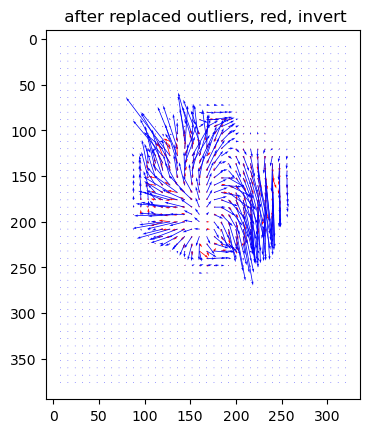

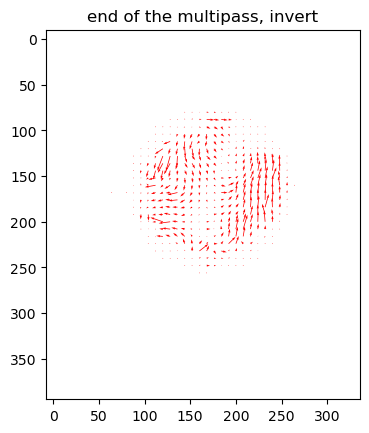

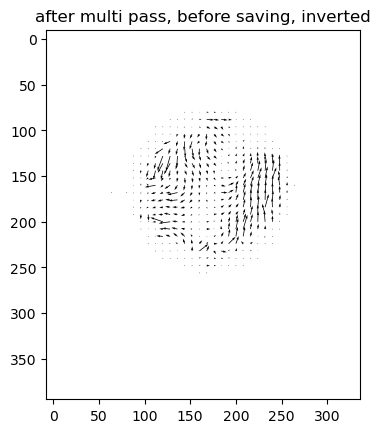

Saving to /home/user/Documents/repos/openpiv-python-poetry/openpiv/data/OpenPIV_results_16_test1/field_A0000.txt


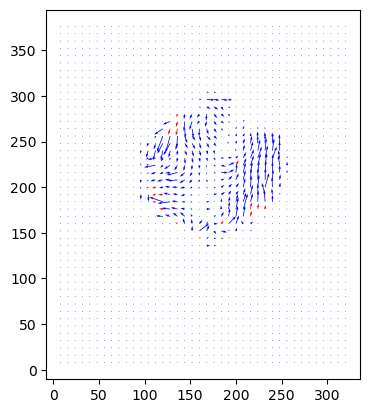

Image Pair 1
bacteria-in-droplet-0 bacteria-in-droplet-1


In [45]:
windef.piv(settings)